In [13]:
import cv2
import os

import matplotlib.pyplot as plt
import numpy as np
import enum
import tqdm

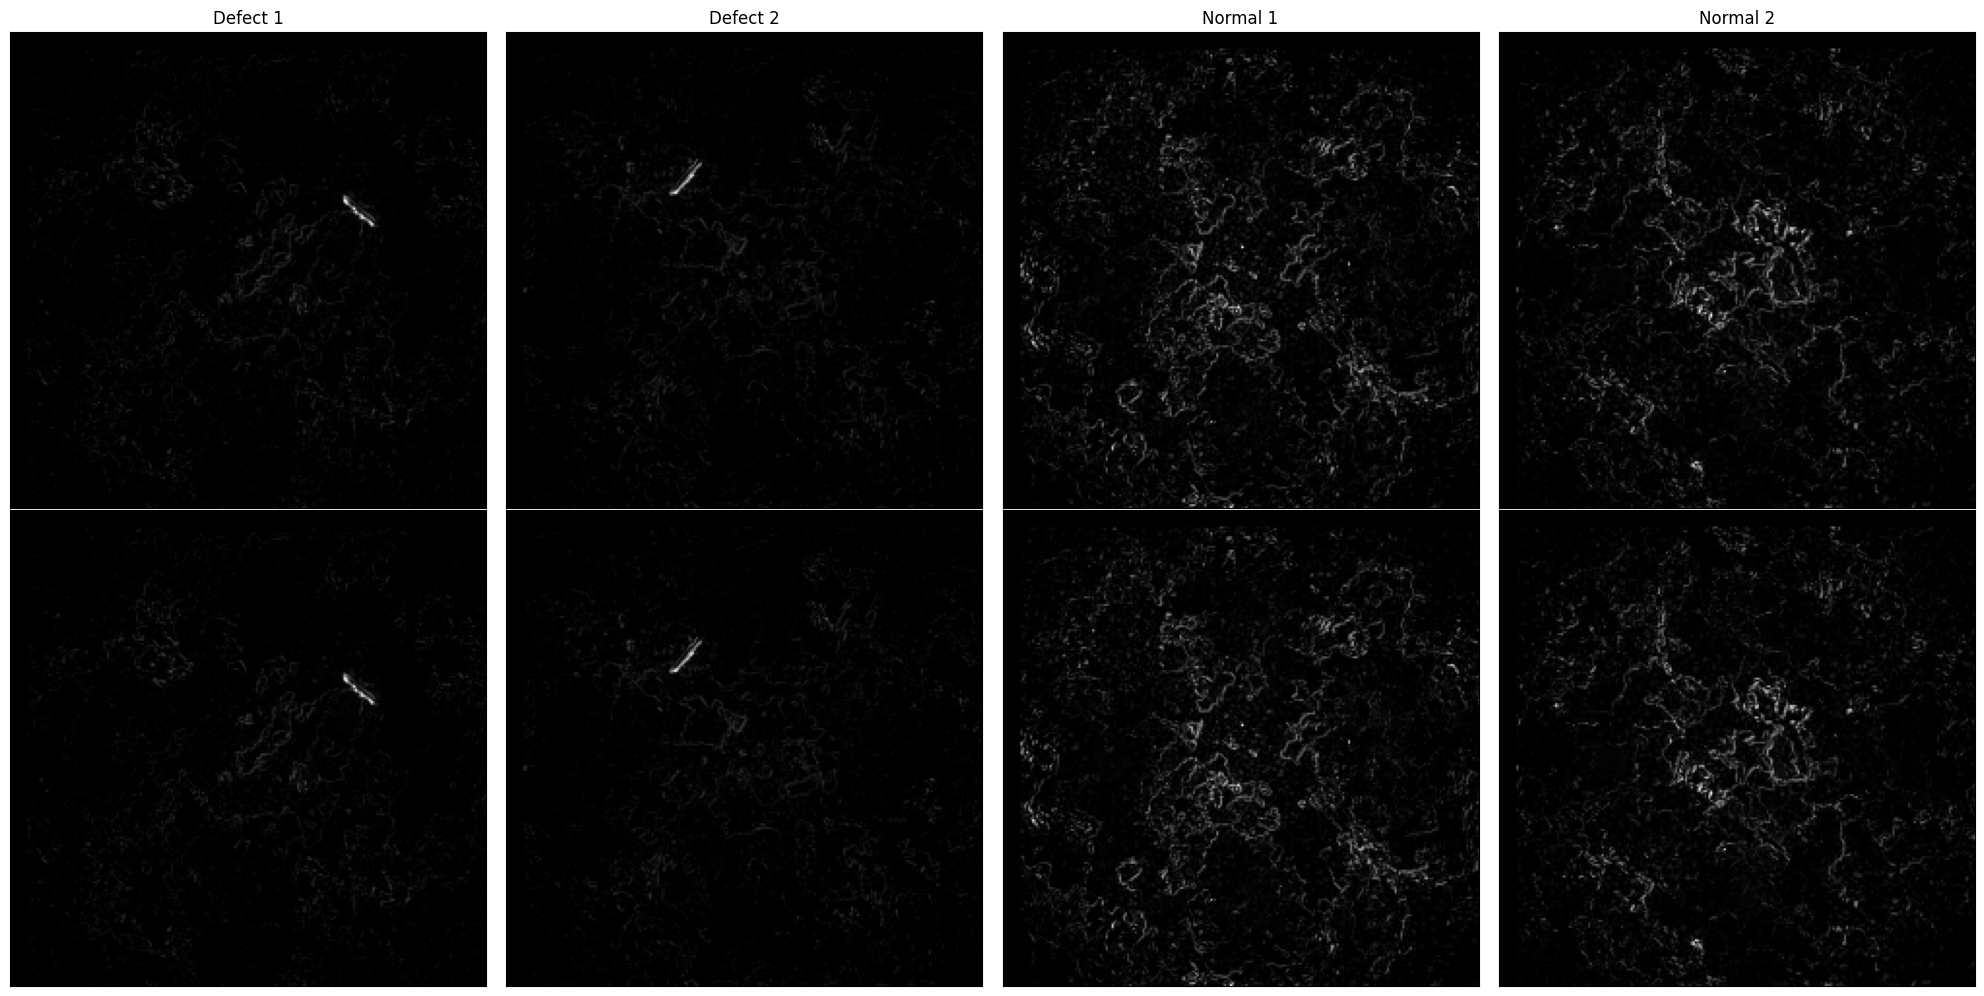

In [51]:
# ----------------------- Plot defect and normal images ---------------------- #
images = []
images.append(cv2.imread('test/error_1.png'))
images.append(cv2.imread('test/error_2.png'))
images.append(cv2.imread('test/error_48.png'))
images.append(cv2.imread('test/error_49.png'))

def plot_images(images, titles = None, time=0):
    fig, axes = plt.subplots(len(images)//4, 4, figsize=(20, 5*len(images)//4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_xticks([]); ax.set_yticks([])
    
    if titles is not None:
        for ax, title in zip(axes.flat, titles):
            ax.set_title(title)
    else:
        if len(axes.shape) == 1:
            axes[0].set_title('Defect 1')
            axes[1].set_title('Defect 2')
            axes[2].set_title('Normal 1')
            axes[3].set_title('Normal 2')
        else:
            axes[0,0].set_title('Defect 1')
            axes[0,1].set_title('Defect 2')
            axes[0,2].set_title('Normal 1')
            axes[0,3].set_title('Normal 2')
    


    plt.tight_layout()
    if time == 0:
        plt.show()
    else:
        plt.pause(time)

plot_images(images+images)

In [ ]:



def confusionMatrix(image, threshold):

    image = cv2.GaussianBlur(image, (5, 5), 0)
    image_threshold = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY )[1]
    if cv2.countNonZero(image_threshold) > 50:
        return 1
    else:
        return 0



def Threshold():
    # Get every image in the folder "test/"
    image_folder = "test"
    
    
    pred = []
    for i in tqdm.tqdm(range(256)):
        conf = []
        j = 0
        for filename in os.listdir(image_folder):
            if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
                image_path = os.path.join(image_folder, filename)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                result = confusionMatrix(image, i)
                conf.append(result)
                j += 1
        pred.append(conf)
    return pred

pred = Threshold()

100%|██████████| 256/256 [00:39<00:00,  6.48it/s]


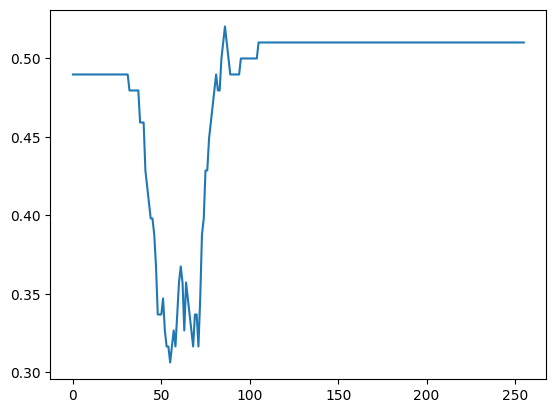

In [12]:
truth = [1] * 48 + [0] * 50
acc = []
for i in range(len(pred)):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for j in range(len(pred[i])):
        if pred[i][j] == 1 and truth[j] == 1:
            tp += 1
        elif pred[i][j] == 0 and truth[j] == 0:
            tn += 1
        elif pred[i][j] == 1 and truth[j] == 0:
            fp += 1
        elif pred[i][j] == 0 and truth[j] == 1:
            fn += 1
    acc.append((tp + tn) / (tp + tn + fp + fn))

plt.plot(acc)
plt.show()


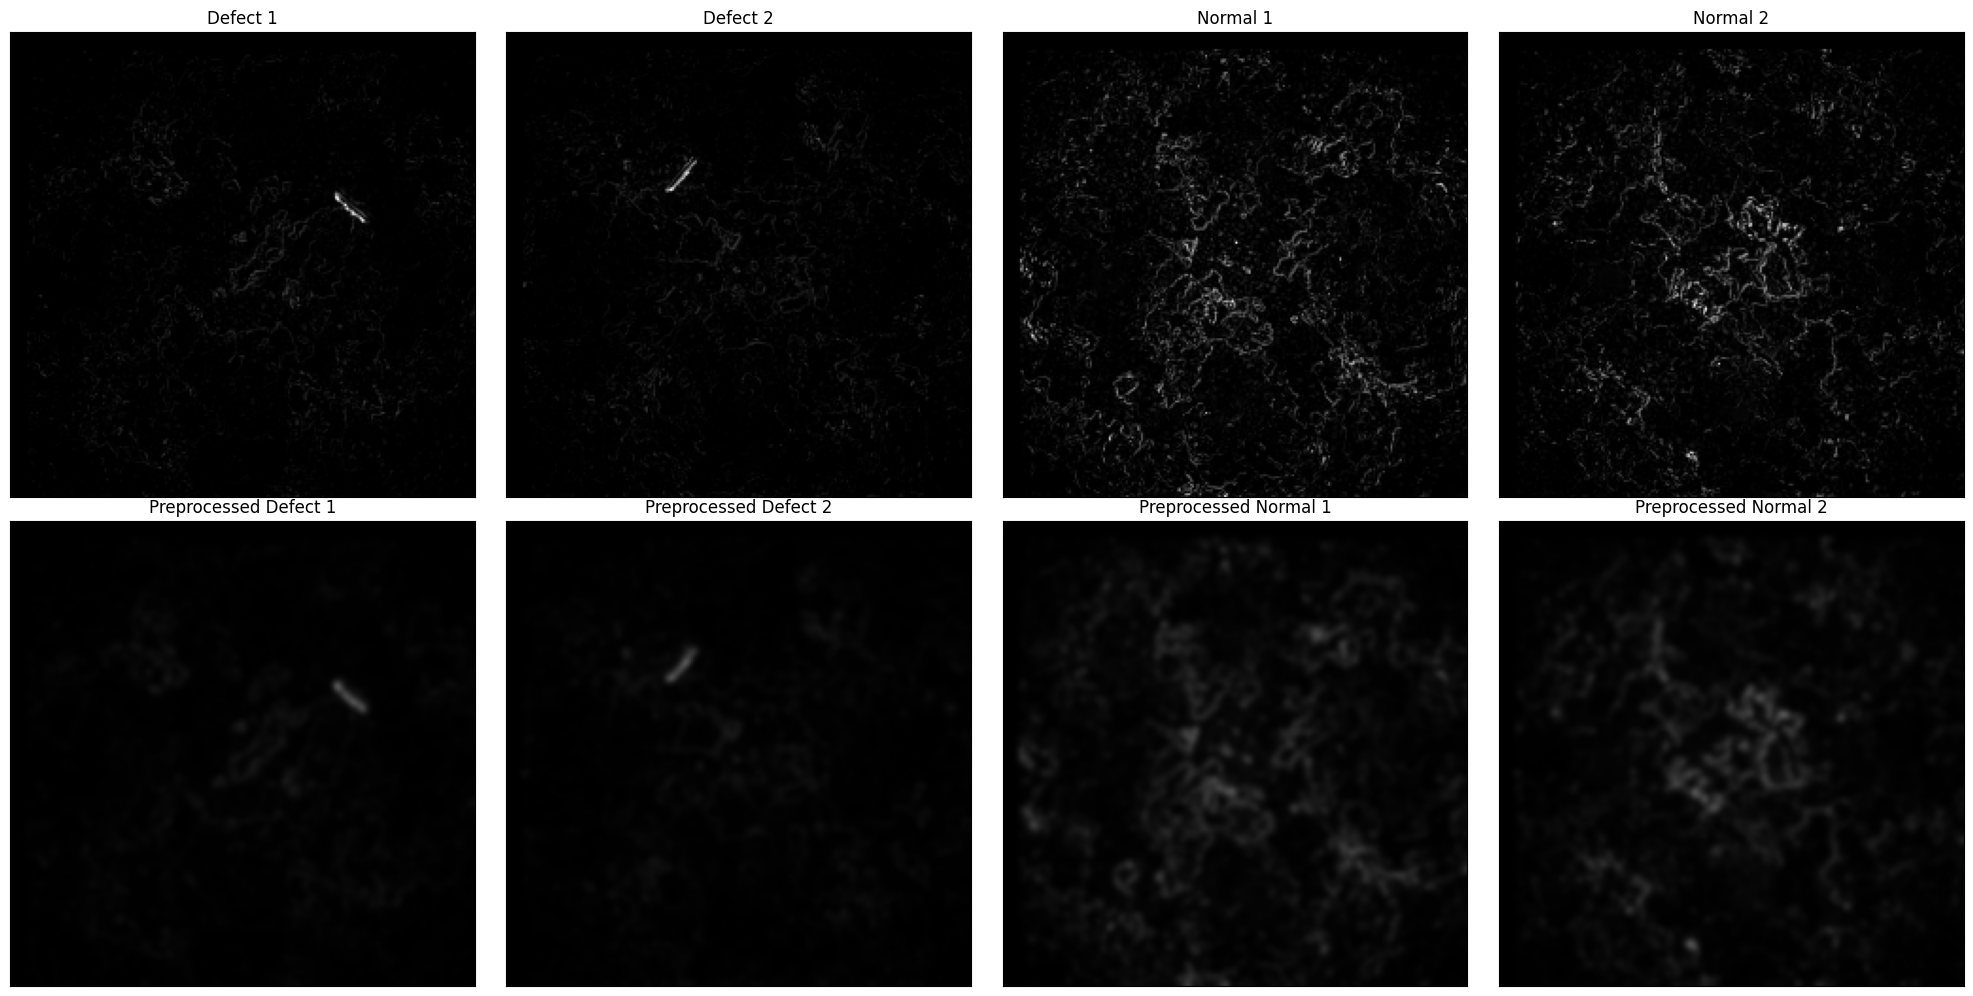

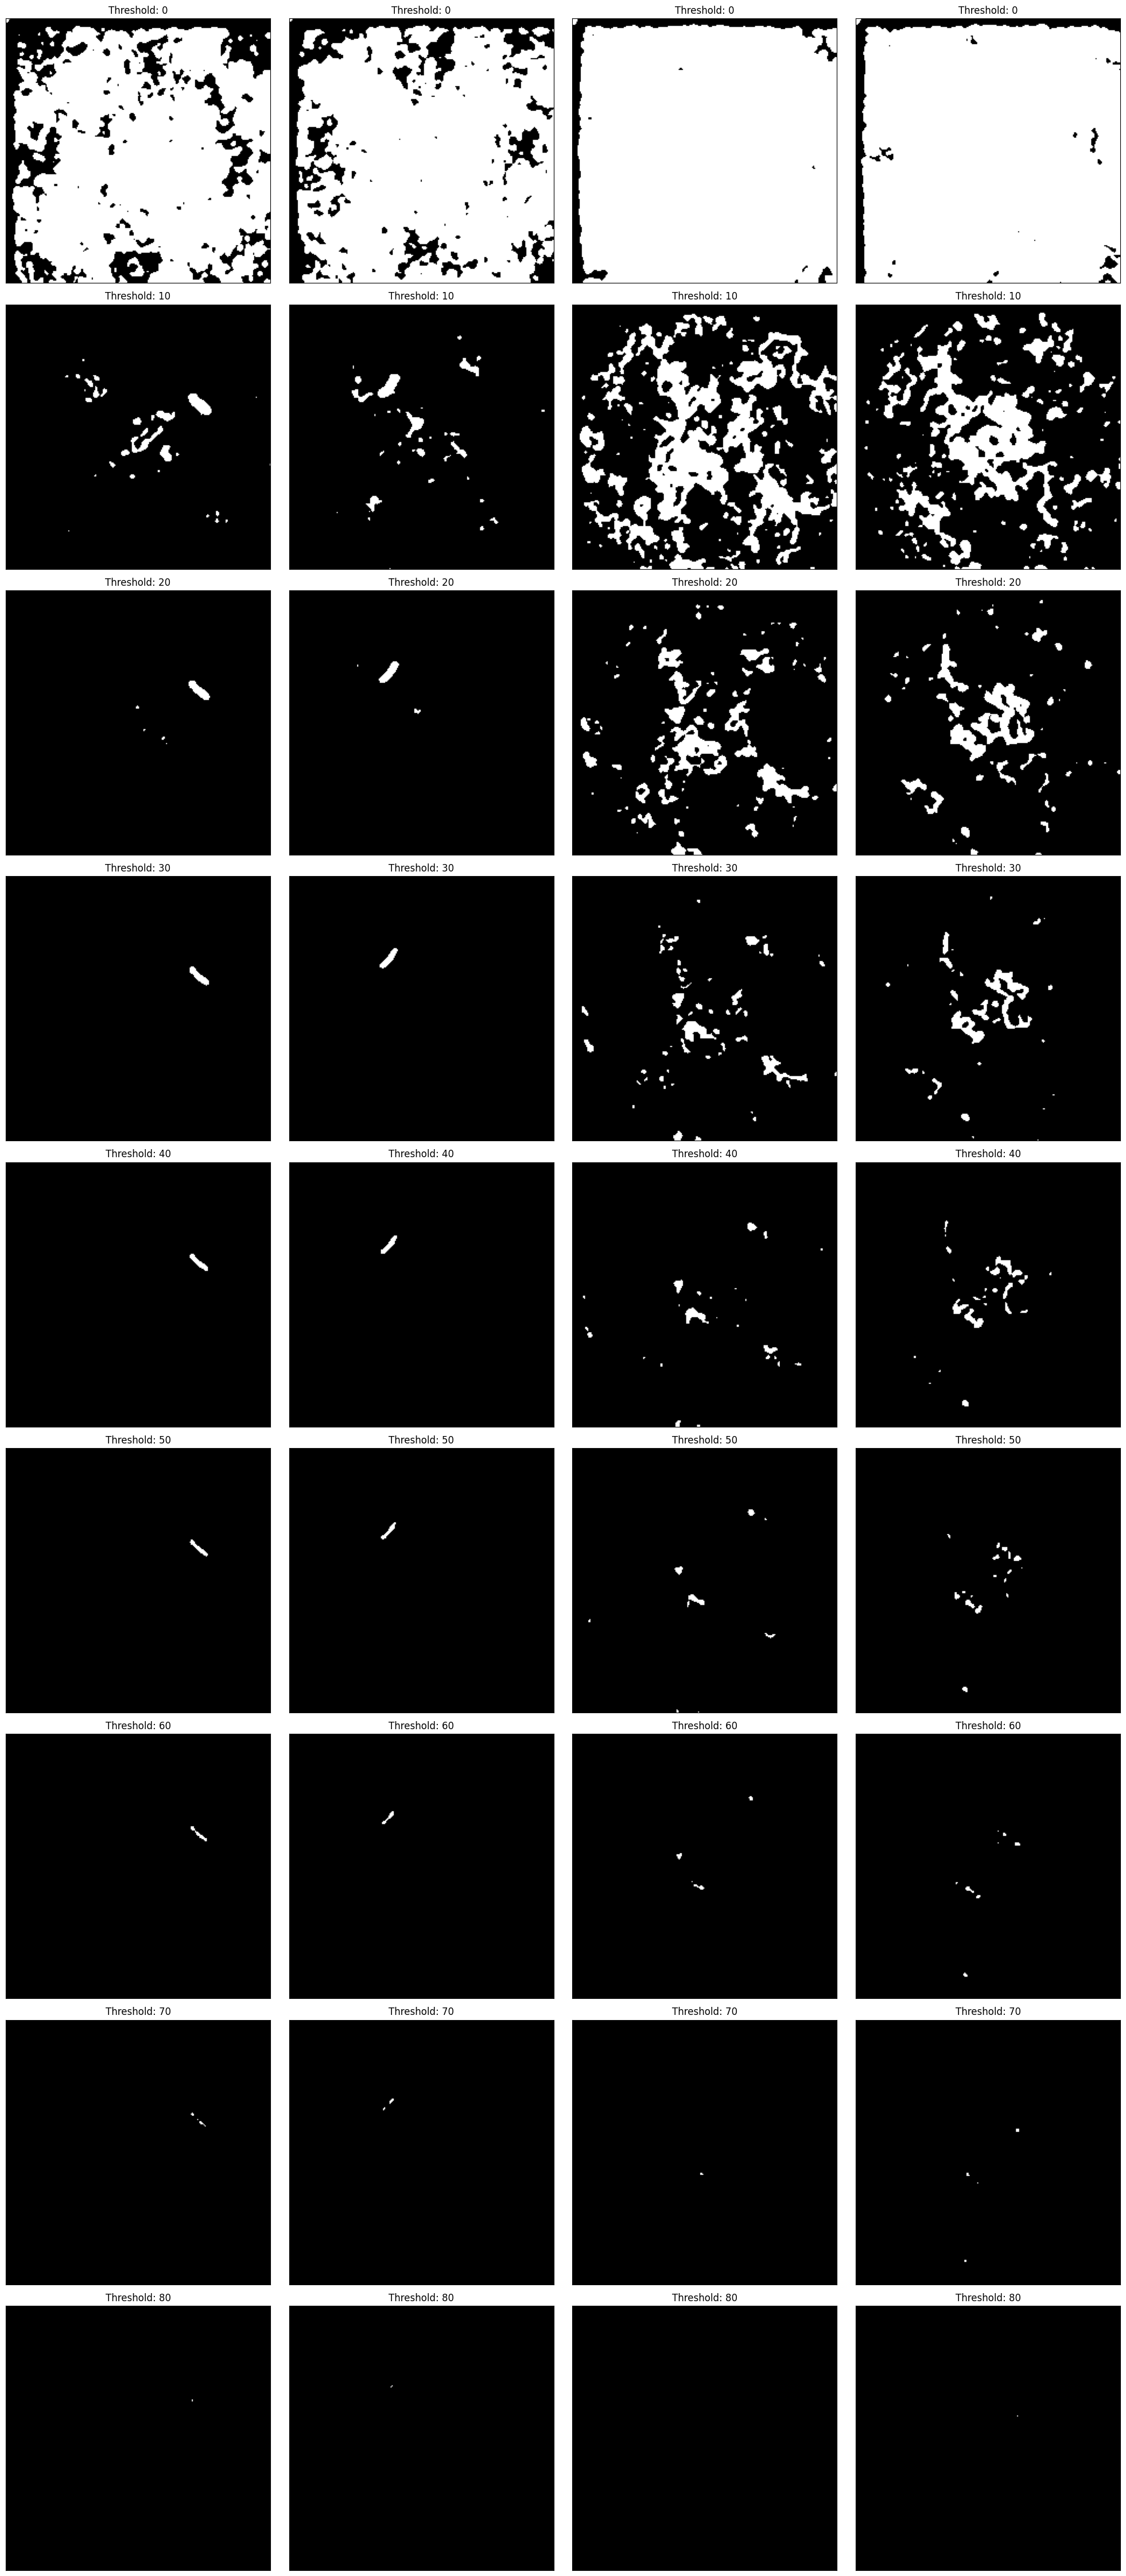

In [67]:
def preprocessing(image):
    # image = cv2.morphologyEx(image, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_OPEN, (3, 3)))
    # image = cv2.GaussianBlur(image, (5, 5), 0)
    image = cv2.GaussianBlur(image, (9,9), 0)
    return image

def threshold(image, threshold):
    image_threshold = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY )[1]
    return image_threshold

processed_images = []
for image in images:
    processed_images.append(preprocessing(image))


headers = ["Defect 1", "Defect 2", "Normal 1", "Normal 2"]
plot_images(images + processed_images, headers + ["Preprocessed " + header for header in headers], 0.1)

max_pixel_value = max([image.max() for image in processed_images])
filtered_images = []
titles = []
for i in range(0, max_pixel_value, 10):
    whitePixels = []    
    for image in processed_images:
        filtered_images.append(cv2.threshold(image, i, 255, cv2.THRESH_BINARY )[1])
        titles.append("Threshold: " + str(i))
    
plot_images(filtered_images, titles, 0.1)
    